<div align="center">
    <h1> <b>DEPARTAMENTO DE RECURSOS HUMANOS</b></h1>
    <h1> <b>REGRESIÓN POLINOMIAL</b></h1><br>
</div>
<div>
    <h3> <b>Algoritmos: Regresión Polinomial.</b></h3>
</div>

# 1. COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO.

## 1.1 Entendimiento del Negocio, Objetivo del Proyecto y Características del Dataset.

#### El departamento de recursos humanos desea fichar a un empleado de otra empresa que al parecer es un muy buen partido para hacer mach y queremos hacerle una oferta de trabajo que este acorde a sus habilidades y capacidades (tiene 20 años de experiencia) y gana 160 mil dolares en la compañía que esta actualmente. Obtenemos la información con una tabla de 10 puestos diferentes.

#### Objetivo: predecir y asignar un sueldo objetivo a este postulante según su nivel de experiencia.

## 1.2 Características del dataset.

#### Position: puesto en el que se encuentra en la empresa el empleado.
#### Level: nivel profesional del empleado.
#### Salary: sueldo anual del empleado.

# 2. Importar librerías y Datos.

## 2.1 Importar librerías.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2.2 Leer el dataset.

In [18]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## 2.3 Crear grupo de variables independientes y dependientes. 

In [60]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

In [61]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [62]:
X.shape

(10, 1)

In [63]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [64]:
y.shape

(10, 1)

In [65]:
dataset.shape

(10, 3)

# 3. Entrenar el modelo de Regresión Polinómica con todo el conjunto de datos.

## 3.1 Dividir el dataset en conjunto de entrenamiento y de testing.
#### Podríamos haber usado todo el conjunto para dividirlo en grupo de entrenamiento y grupo de testing, sin embargo, no es necesario, gracias al pequeño tamaño de la muestra. Por lo tanto, comentaremos la siguiente línea:

In [59]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

## 3.2 Escalar las variables.
#### Tampocoserá necesario escalar las variables, ya que el modelo de regresión polinómica busca entender las relaciones NO lineales, de hecho la gracia esta en visualizar como esos datos NO lineales se traducen en un modelo NO lineal. Si lo escalara podría incluso perder la forma.

## 3.3 Ajustar la Regresión Polinómica con el dataset.

### 3.3.1 Ajustar la Regresión Lineal.
#### Comparemos y observemos que es lo que ocurre cuando se intenta ajustar datos No lineales con un modelo lineal.

In [66]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # cambiamos ligeramente el nombre de la regresión ya que usaremos la misma función.
lin_reg.fit(X, y) # como usamos todo el conjunto de datos, solo ingresamos a X e y.

LinearRegression()

### 3.3.2 Ajustar la Regresión Polinómica.

In [69]:
from sklearn.preprocessing import PolynomialFeatures # rasgos o características polinomiales.
poly_reg = PolynomialFeatures(degree = 2) # Objeto que utilizará la función polinomial feature. Parámetro, grado máximo que espero en la función
X_poly = poly_reg.fit_transform(X) # transformar la variable y sacar una X poly, igual que el objeto poly_reg se encargue de modificar nuestra matriz de datos X, generando no solo las columnas, si no sus cuadrados. El fit_transorm aplica los cambios al propio objeto. 

#### Ahora necesitaremos un nuevo objeto para la Regresión Polinómica.

In [70]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

# 4. Visualización de los modelos.

## 4.1 Visualización del Modelo Lineal.

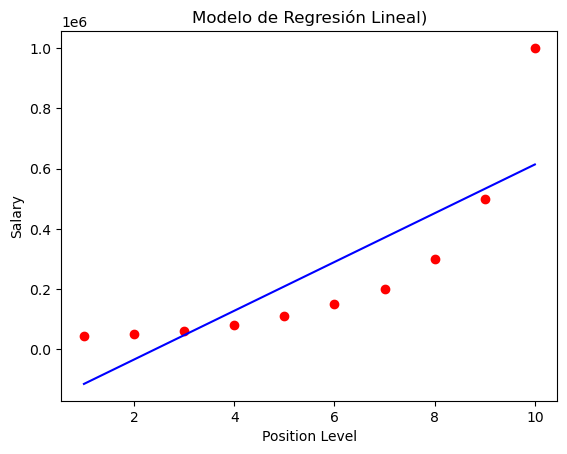

In [71]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Modelo de Regresión Lineal)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## 4.2 Visualización del Modelo Polinómico.

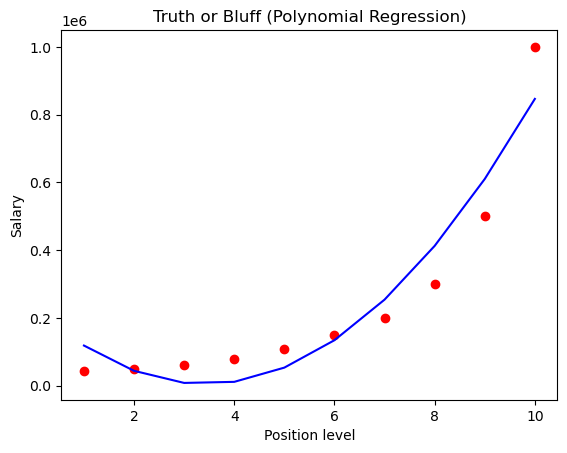

In [72]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 4.3 Visualización del Modelo Polinómico con Grados Superiores.

In [96]:
from sklearn.preprocessing import PolynomialFeatures # rasgos o características polinomiales.
poly_reg = PolynomialFeatures(degree = 5) # Objeto que utilizará la función polinomial feature. Parámetro, grado máximo que espero en la función
X_poly = poly_reg.fit_transform(X) # transformar la variable y sacar una X poly, igual que el objeto poly_reg se encargue de modificar nuestra matriz de datos X, generando no solo las columnas, si no sus cuadrados. El fit_transorm aplica los cambios al propio objeto. 

In [97]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

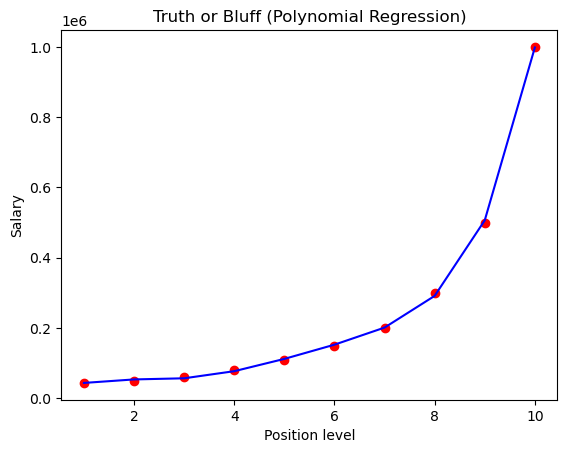

In [98]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# 5. Predicción de un resultado nuevo con la Regresión Lineal.

In [99]:
lin_reg.predict([[6.5]])

array([[330378.78787879]])

# 6. Predicción de un resultado nuevo con la Regresión Polinómica.

In [100]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([[174878.07765118]])